<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#ff914d  ; overflow:hidden"><b>Making HOME TO East Navigate</b></div>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#ff914d  ; overflow:hidden"><b>Install YOLO11 by Ultralytics</b></div>

In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#ff914d  ; overflow:hidden"><b>Importing Data From RoboFlow</b></div>

In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CkeOU2C2Ax0ksSCreGvi")
project = rf.workspace("livscan").project("liver-swyya")
version = project.version(6)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to liver-6 in yolov11:: 100%|██████████| 1660/1660 [00:00<00:00, 8607.88it/s]


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#ff914d  ; overflow:hidden"><b>Training YOLO</b></div>

In [4]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 19.7M/19.7M [00:00<00:00, 132MB/s] 
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/liver-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, a

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#ff914d  ; overflow:hidden"><b>Showing Metrics </b></div>

In [5]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskF1_curve.png	 train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1743215279.f0572c168b22.1415.0  train_batch1800.jpg  val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1801.jpg  weights
labels.jpg					    train_batch1802.jpg


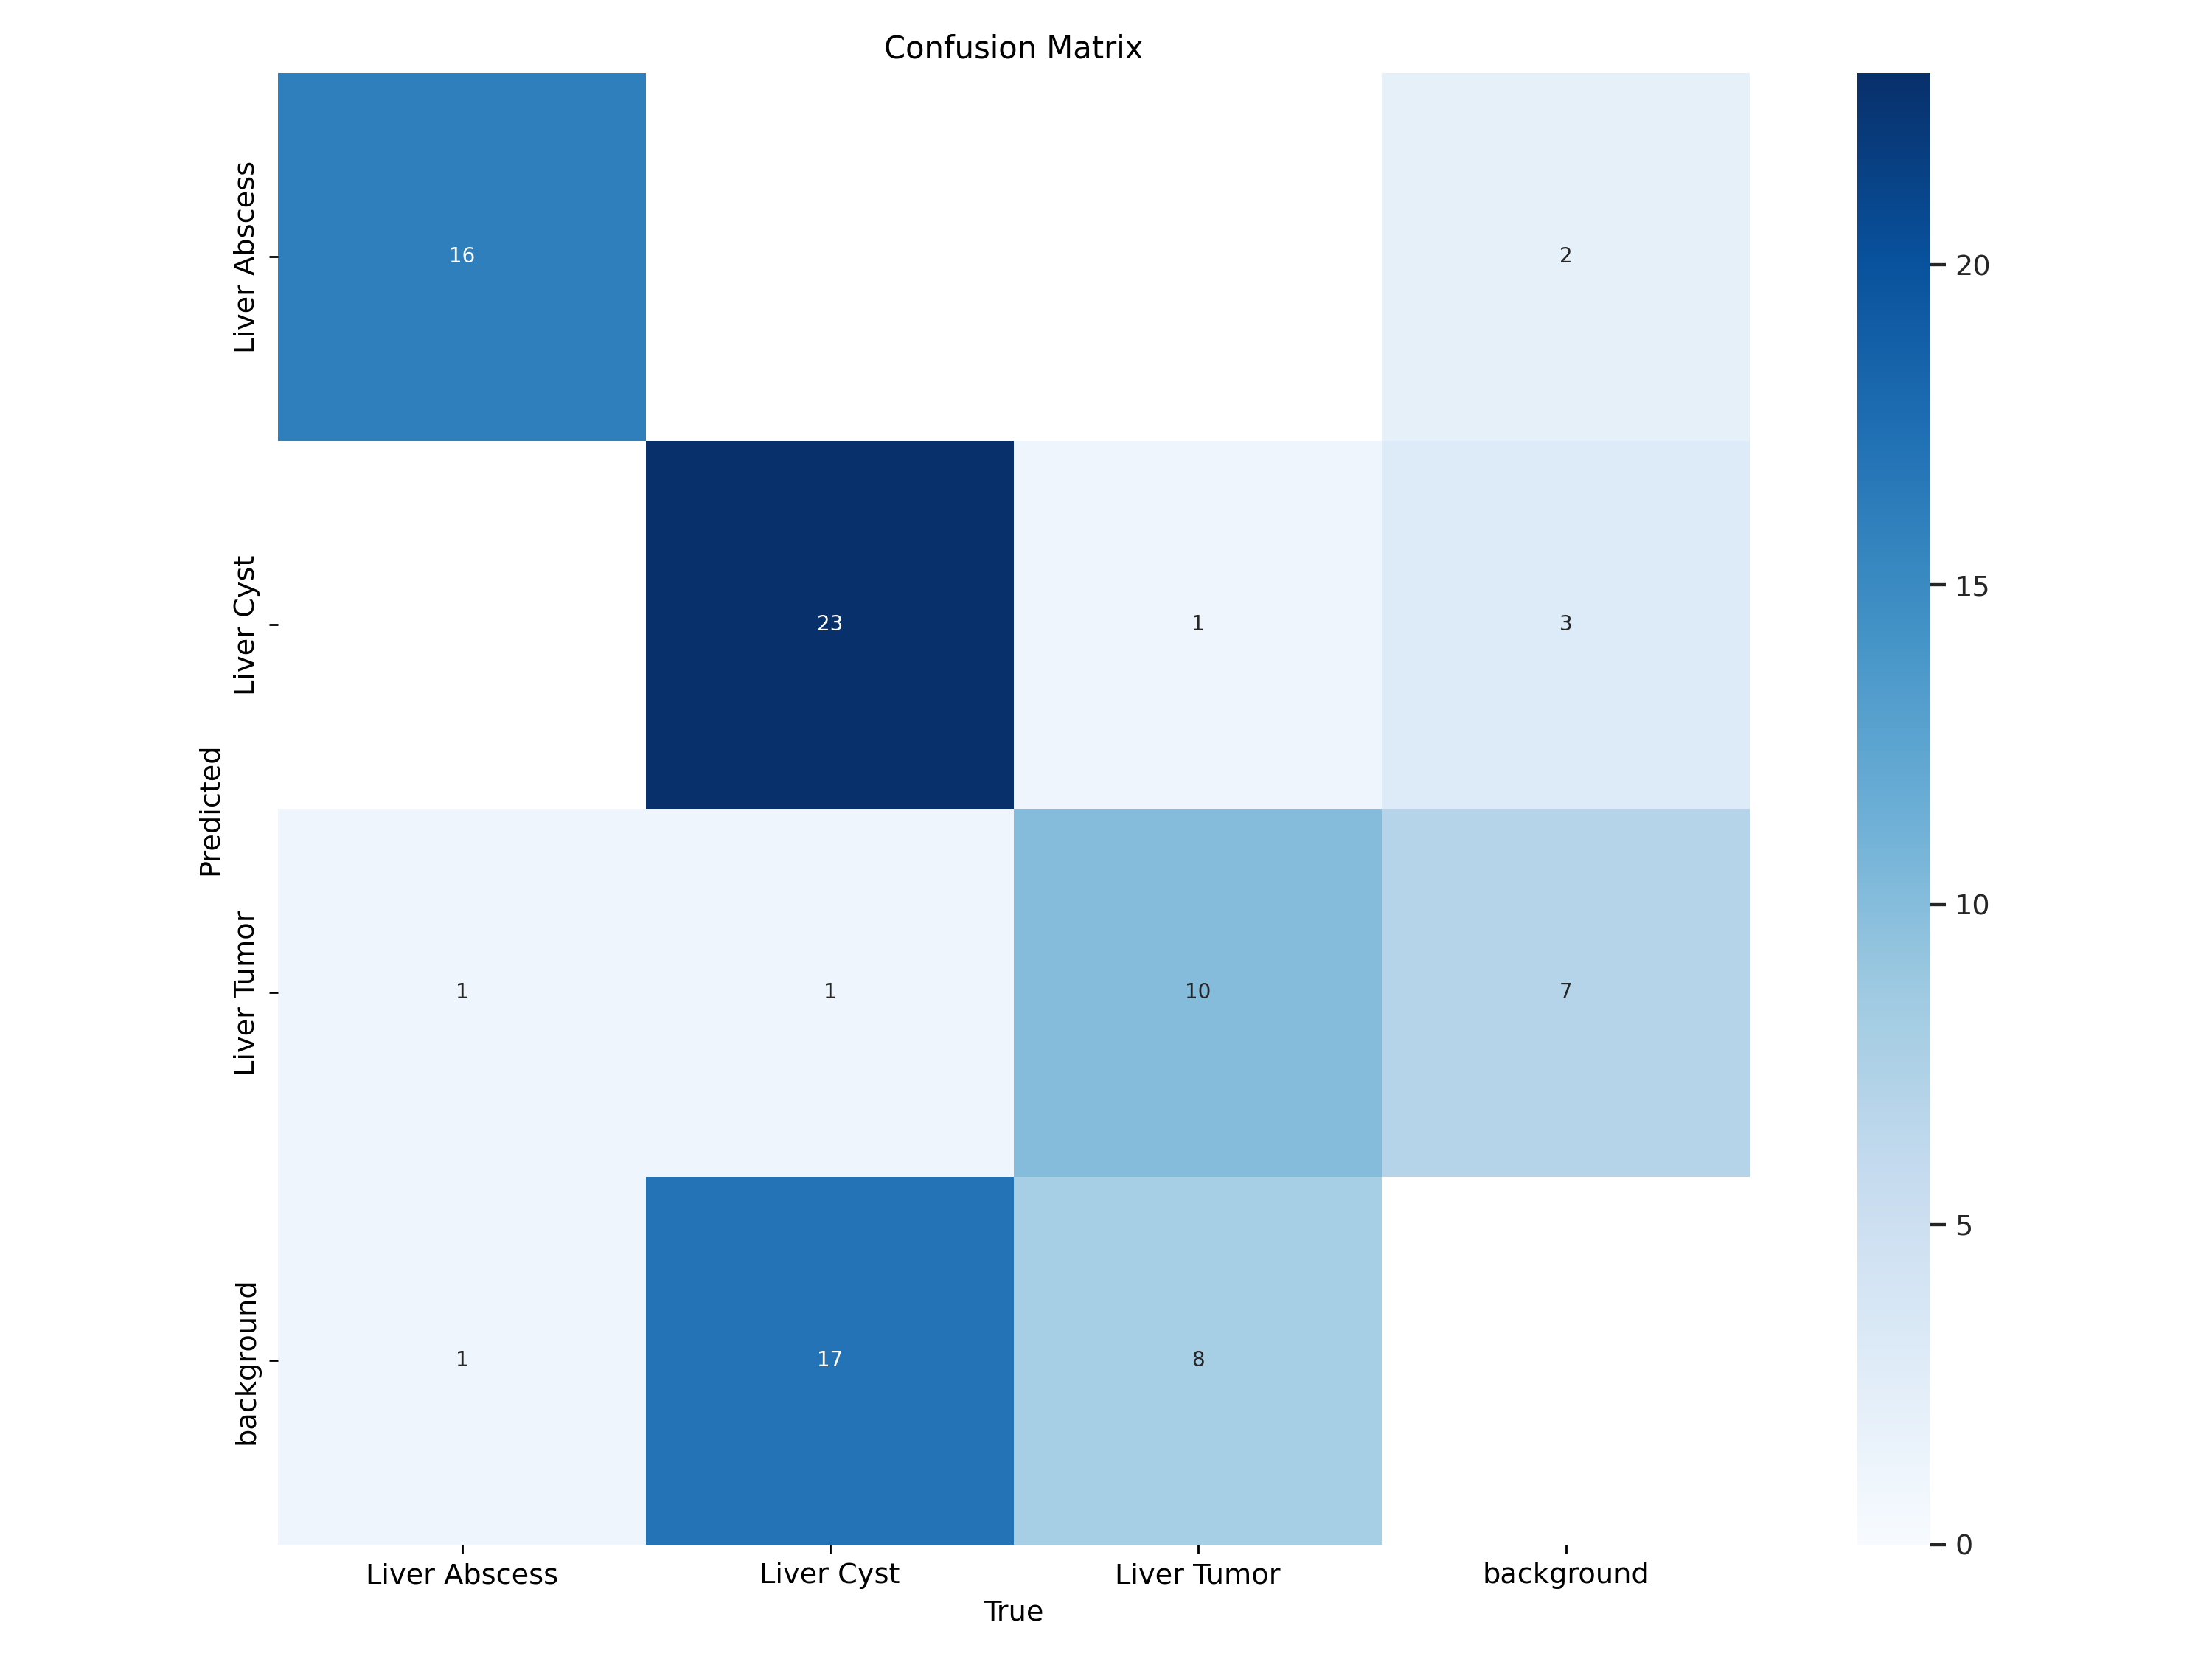

In [6]:
from IPython.display import Image as IpyImage
IpyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png',width=600)

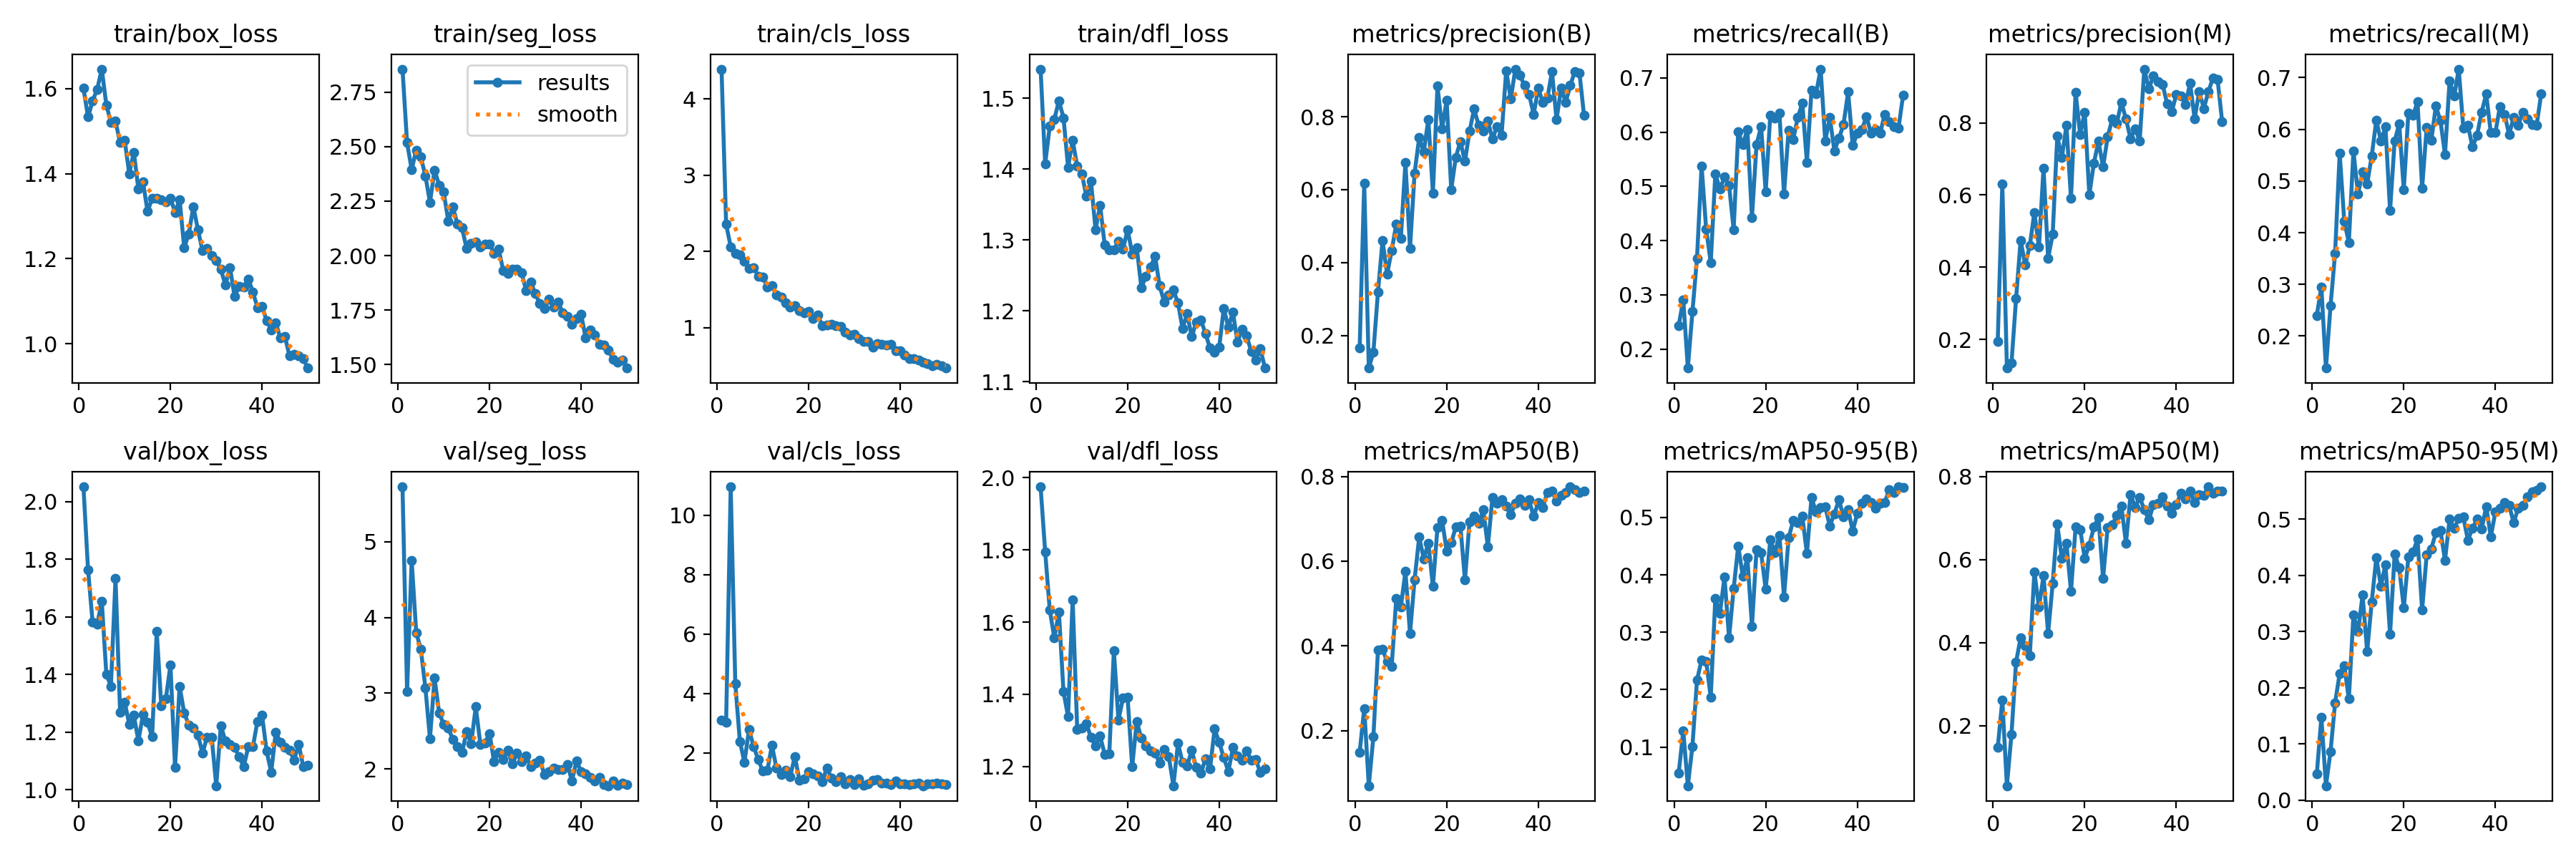

In [7]:
from IPython.display import Image as IpyImage
IpyImage(filename=f'{HOME}/runs/segment/train/results.png',width=2048)

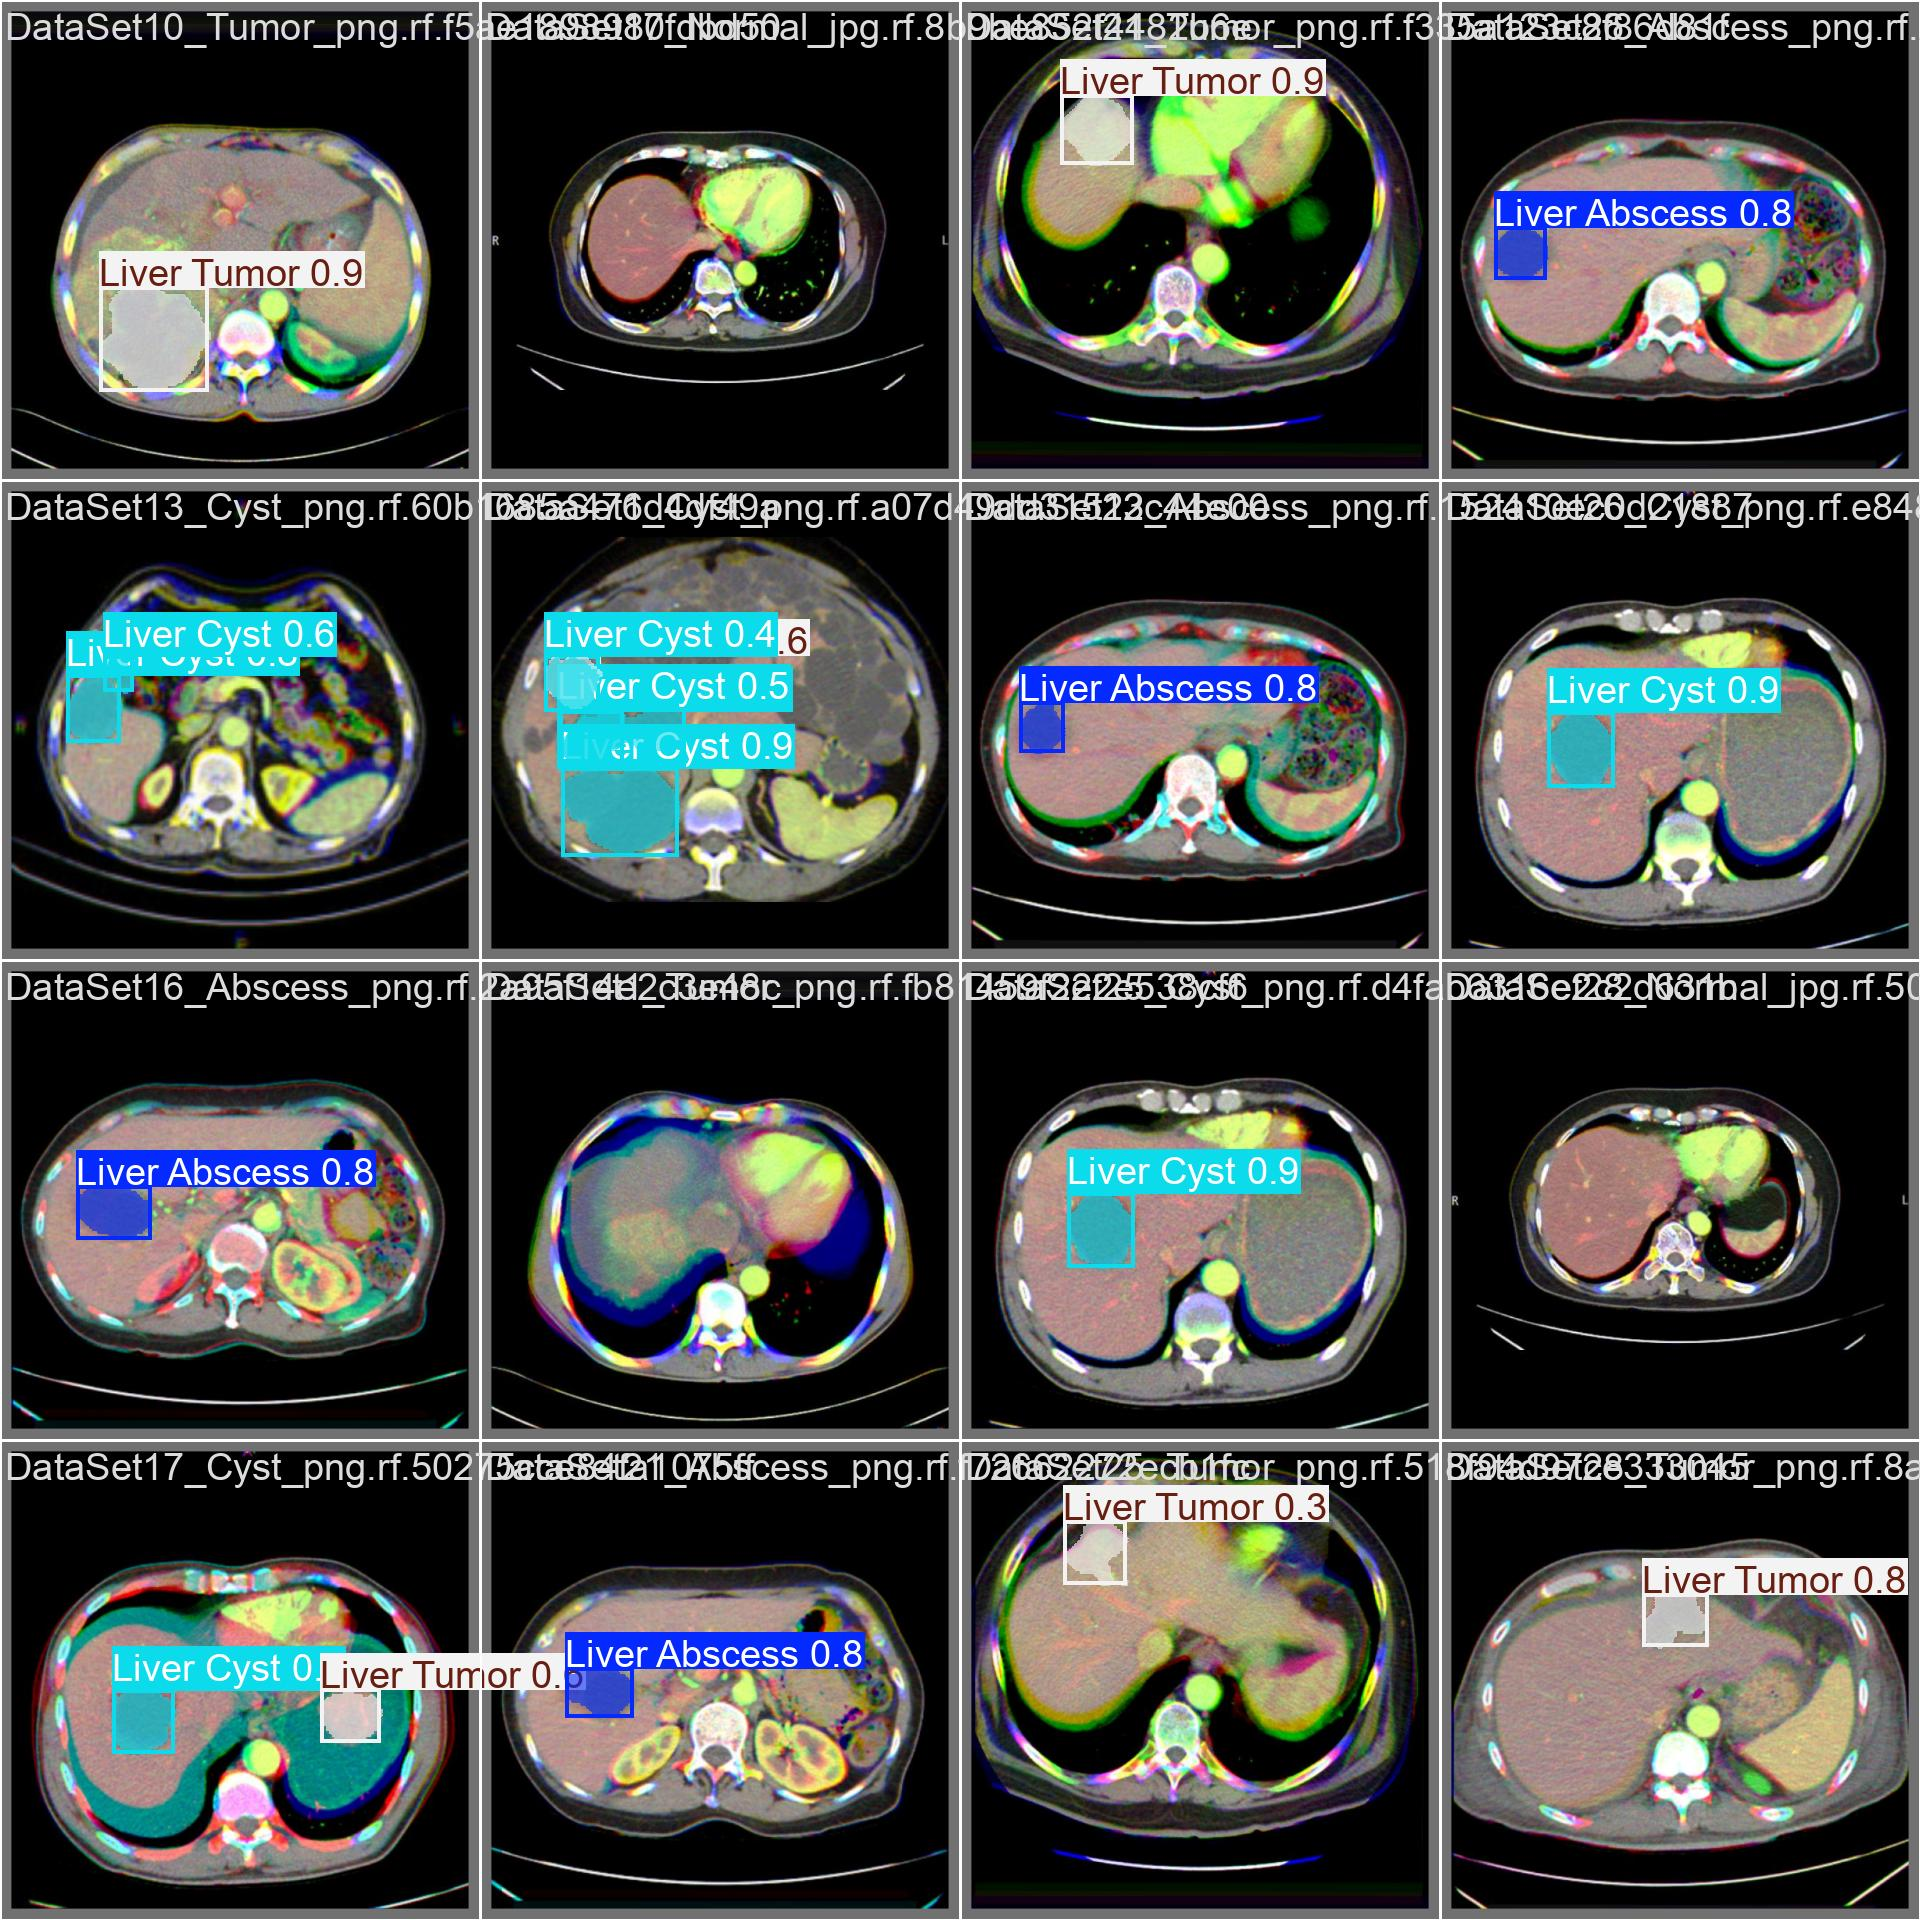

In [8]:
from IPython.display import Image as IpyImage
IpyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg',width=2048)

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#ff914d  ; overflow:hidden"><b>Validate fine_tuned Model</b></div>

In [9]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/liver-6/valid/labels.cache... 70 images, 20 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.51it/s]
                   all         70         78      0.804      0.668      0.765      0.551      0.804      0.668      0.765      0.557
         Liver Abscess         17         18      0.892      0.923      0.944      0.689      0.892      0.923      0.944      0.708
            Liver Cyst         16         41      0.883      0.554       0.73      0.548      0.883      0.554      0.717     

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#ff914d  ; overflow:hidden"><b>Predict Test Data</b></div>

In [10]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs

image 1/34 /content/datasets/liver-6/test/images/DataSet11_Abscess_png.rf.e1a7fafde381b13f54c838b93940773a.jpg: 640x640 1 Liver Abscess, 20.2ms
image 2/34 /content/datasets/liver-6/test/images/DataSet11_Tumor_png.rf.11f06da9f176ae29fec066dda731aed2.jpg: 640x640 1 Liver Tumor, 20.2ms
image 3/34 /content/datasets/liver-6/test/images/DataSet16_Cyst_png.rf.370fe53ac410cee27c8120f76ec8b7ec.jpg: 640x640 1 Liver Cyst, 20.2ms
image 4/34 /content/datasets/liver-6/test/images/DataSet17_Abscess_png.rf.caa31004cf492a3678e54624823a6342.jpg: 640x640 1 Liver Abscess, 20.1ms
image 5/34 /content/datasets/liver-6/test/images/DataSet19_Normal_jpg.rf.5b737001559da343fa5fdd47861f971c.jpg: 640x640 (n

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#ff914d  ; overflow:hidden"><b>Showing Prediction</b></div>

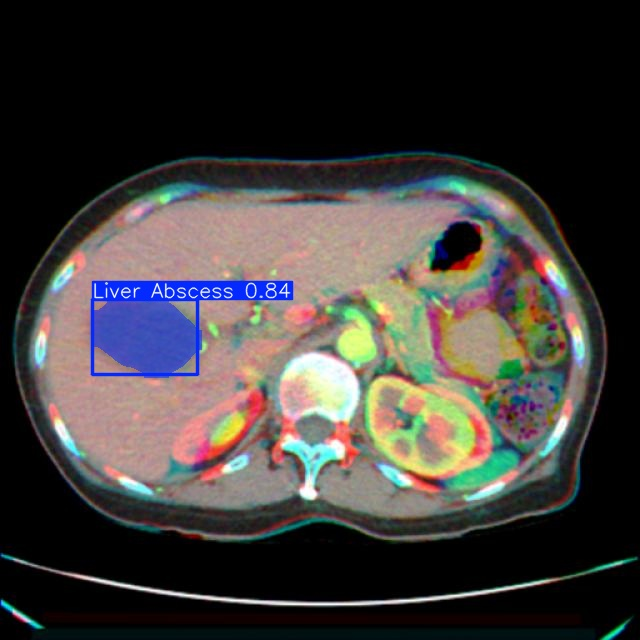

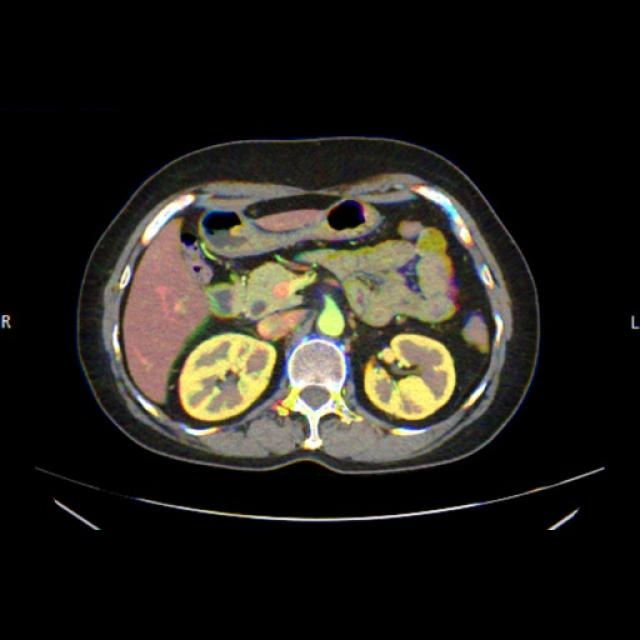

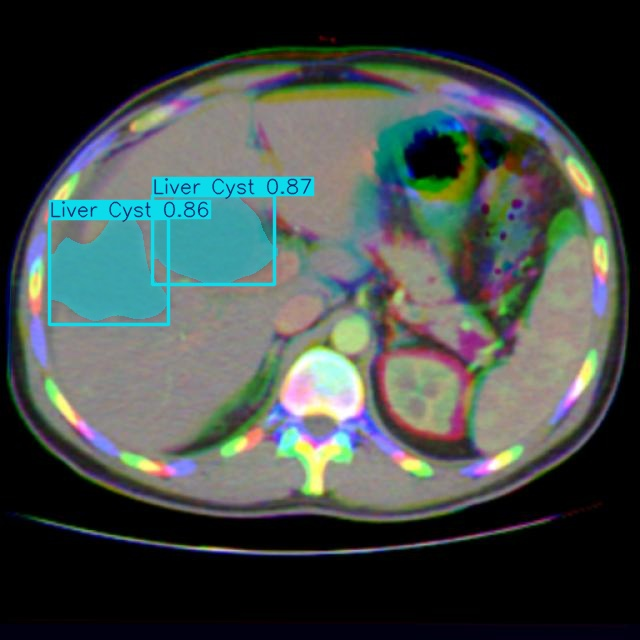

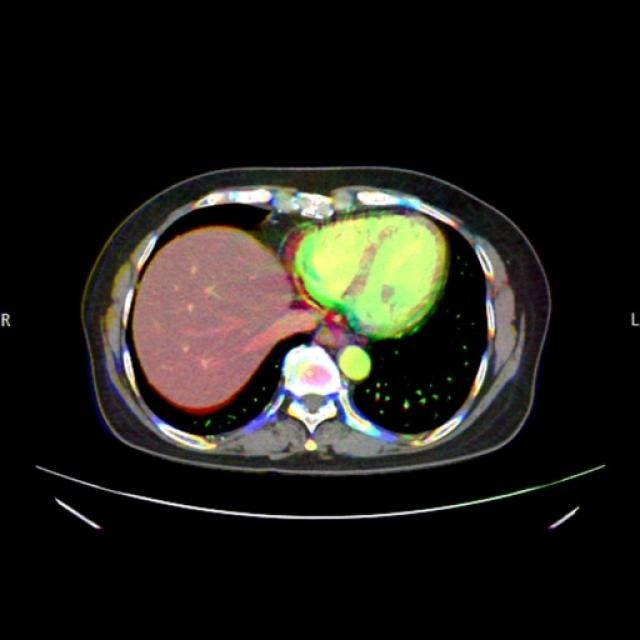

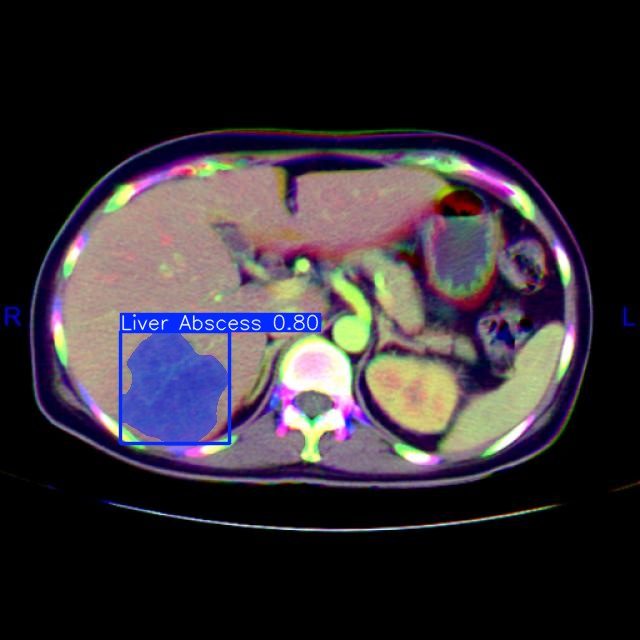

In [11]:
import glob
from IPython.display import Image as IpyImage,display
latest_folder=max(glob.glob(f'{HOME}/runs/segment/predict*/'),key=os.path.getmtime)   ##Finds the latest folder by checking modification time

for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:  ## Displaying 5 Predicted Samples
  display(IpyImage(filename=img, width=600))
  print("\n")